#### 1. Dane:


- pobierz dane 'iris' ze sklearn


- wczytaj dane do dataframe (data i target), dodaj kolumnę (zmapuj) z nazwami zmiennych (dict comprehension)


- zrób podstawową analizę (policz rozkład targetu, sprawdź nulle, outliersy)


- zbadaj korelację i narysuj wykres z seaborn (dokładnie przeanalizuj dane, co mówią poszczególne obrazki!!!!!!!!!!!)

#### 2. Wybór zmiennych do modelu:


- do modelu wybierz zmienne słabiej skorelowane

- narysuj wykres w plotly express i matplotlib rozłożenia zmiennych, z podziałami na klasy (ustaw kolory)

- przygotuj arraye do modelu - wytnij odpowiednie kolumny



#### 3. Przygotuj model:

- użyj różnej ilości przeanalizuj granice i grafy (użyj funkcji żeby było szybciej)

- zbuduj wykres accuracy dla danych treningowych i predyckji, odpowiedz na pytanie jak zmienia się dokładność modelu na danych testowych wraz ze wzrostem max_depth ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10,6)

### 1. Data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
feature_names = [col.replace(' ','_')[:-5] for col in iris['feature_names']]

target_map = {num:iris['target_names'][num] for num in range(len(iris['target_names']))}

In [5]:
df_raw = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= feature_names +['target'])

In [6]:
df_raw['target_name'] = df_raw['target'].map(target_map)

In [7]:
df_raw
df = df_raw.copy()

### 2. Analiza

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    float64
 5   target_name   150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
target_name     0
dtype: int64

In [10]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


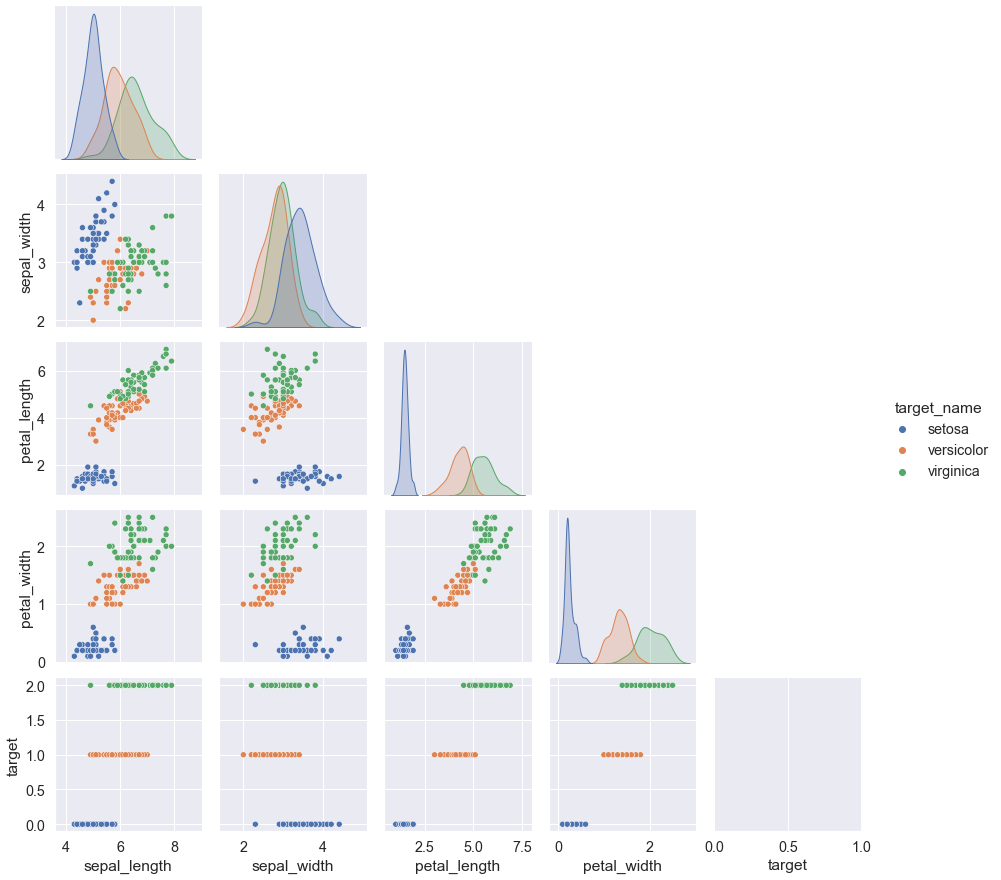

In [11]:
sns.pairplot(df, hue='target_name', corner=True);

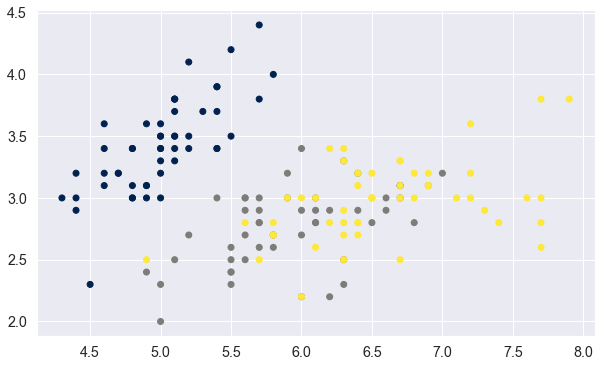

In [12]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['target'], cmap='cividis');

### 3. Podział danych:

In [13]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'target_name'],
      dtype='object')

In [14]:
data = df[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

In [15]:
data = data.values
target = target.values.astype('int8')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

print (f'Data shape: {data.shape}')
print (f'Target shape: {target.shape}\n')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}\n')

print (f'Train ratio: {len(X_train)/len(data)}')
print (f'Test ratio: {len(X_test)/len(data)}\n')

print(f'target dist:')
print (f'{pd.Series(target).value_counts() / len(target)}\n')

print(f'train target dist:')
print (f'{pd.Series(y_train).value_counts() / len(y_train)}\n')

print(f'test target dist:')
print (f'{pd.Series(y_test).value_counts() / len(y_test)}\n')

Data shape: (150, 2)
Target shape: (150,)

X_train: (120, 2)
y_train: (120,)
X_test: (30, 2)
y_test: (30,)

Train ratio: 0.8
Test ratio: 0.2

target dist:
0    0.333333
1    0.333333
2    0.333333
dtype: float64

train target dist:
0    0.333333
2    0.333333
1    0.333333
dtype: float64

test target dist:
0    0.333333
2    0.333333
1    0.333333
dtype: float64



### 4. Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
classifier = KNeighborsClassifier(n_neighbors=1)

In [20]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
classifier.score(X_train, y_train)

0.95

In [23]:
classifier.score(X_test, y_test)

0.7

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.7

In [26]:
def train_test_accuracy(X_train, y_train, X_test, y_test, max_depth = 5):
    
    train_acc = []
    test_acc = []
    depth = []
    
    for a in range(1,max_depth+1):
        classifier = KNeighborsClassifier(n_neighbors=a)
        classifier.fit(X_train, y_train)
        prediction = classifier.predict(X_test)
        
        depth.append(a)
        train_acc.append (classifier.score(X_train, y_train))
        test_acc.append (classifier.score(X_test, y_test))
        
    df_accuracy = pd.DataFrame(data={'depth': depth, 'train_accuracy': train_acc, 'test_accuracy': test_acc})
    
    # plot train/test accuracy
    plt.figure(figsize=(12,7))
    plt.title('Train vs Test accuracy')
    plt.plot(df_accuracy['depth'], df_accuracy['train_accuracy'], label= 'train_acc')
    plt.plot(df_accuracy['depth'], df_accuracy['test_accuracy'], label= 'test_acc')
    plt.legend()
    plt.ylabel('accuracy')
    plt.xlabel('max_depth');

    
    return df_accuracy

,depth,train_accuracy,test_accuracy
0,1,0.950000,0.700000
1,2,0.883333,0.600000
2,3,0.875000,0.666667
3,4,0.858333,0.633333
4,5,0.850000,0.766667
5,6,0.841667,0.833333
6,7,0.866667,0.766667
7,8,0.850000,0.800000
8,9,0.858333,0.766667
9,10,0.850000,0.766667


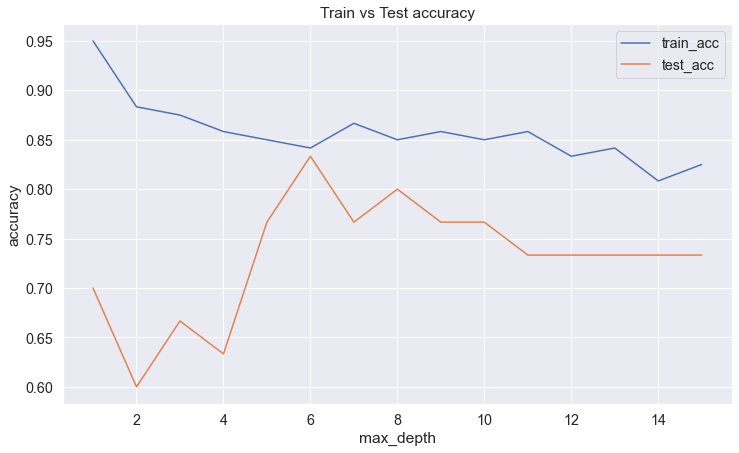

In [27]:
train_test_accuracy(X_train, y_train, X_test, y_test, 15)

In [28]:
 def plot_decision_boundries(n_neighbors=1):
     
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)

    x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1, shading='auto')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={n_neighbors}')
    plt.show()


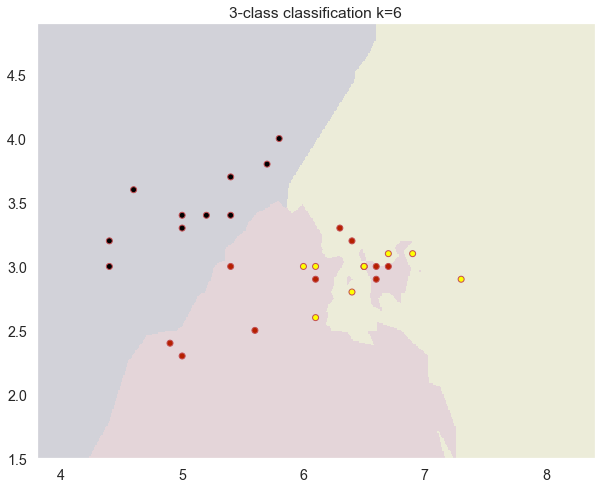

In [29]:
plot_decision_boundries(6)

In [30]:
from sklearn.cr

SyntaxError: invalid syntax (Temp/ipykernel_1280/1781083561.py, line 1)